# CEE 690-02

# Environmental Spatial Data Analysis

# Convolutional Neural Networks

# Artificial Neural Networks

![image.png](https://www.researchgate.net/profile/Facundo-Bre/publication/321259051/figure/fig1/AS:614329250496529@1523478915726/Artificial-neural-network-architecture-ANN-i-h-1-h-2-h-n-o.png?raw=true)

Source: https://www.researchgate.net/profile/Facundo-Bre/publication/321259051/figure/fig1/AS:614329250496529@1523478915726/Artificial-neural-network-architecture-ANN-i-h-1-h-2-h-n-o.png

# Think of ANNs as an approximation of biological neural networks

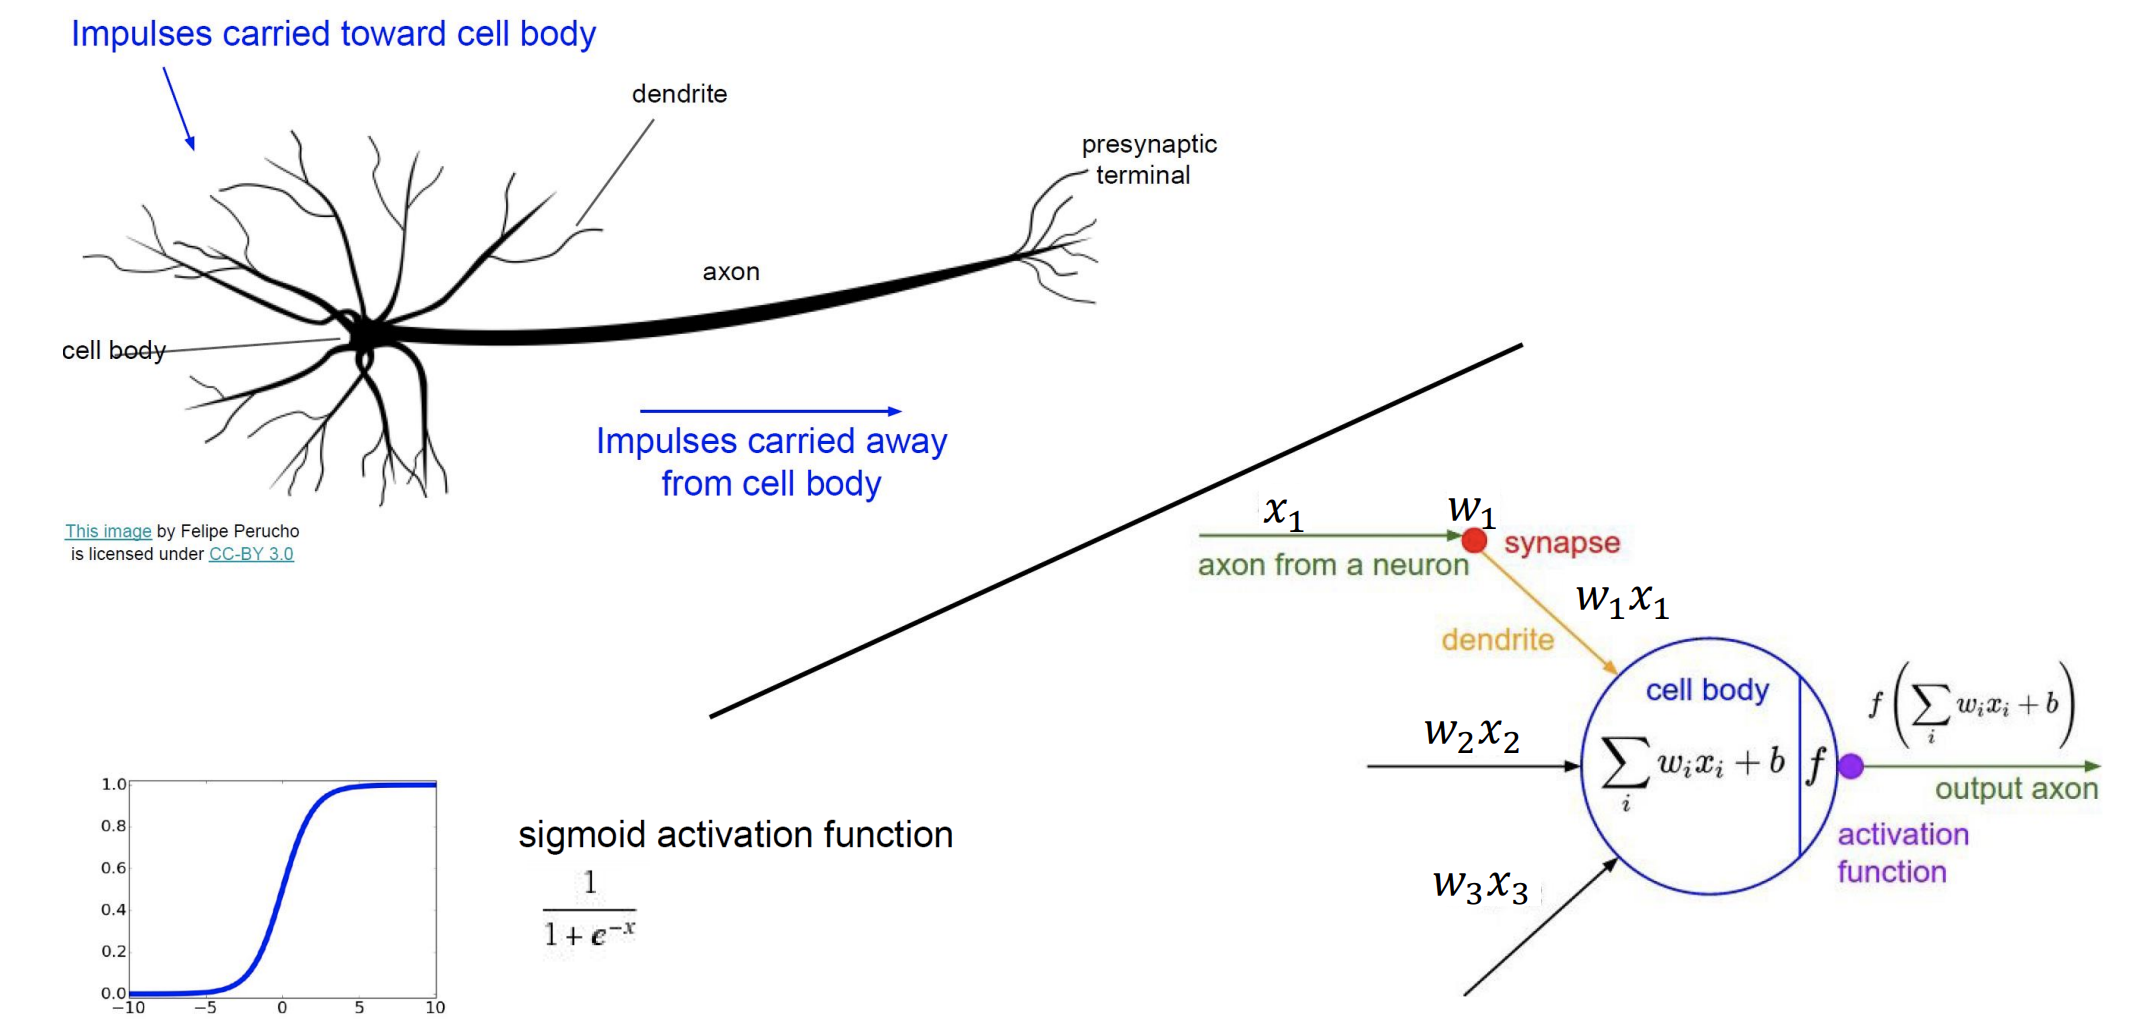

Source: http://ce.sharif.edu/courses/96-97/1/ce959-1/resources/root/slides/MLP%20&%20Backpropagation.pdf

# The timeline of neural networks

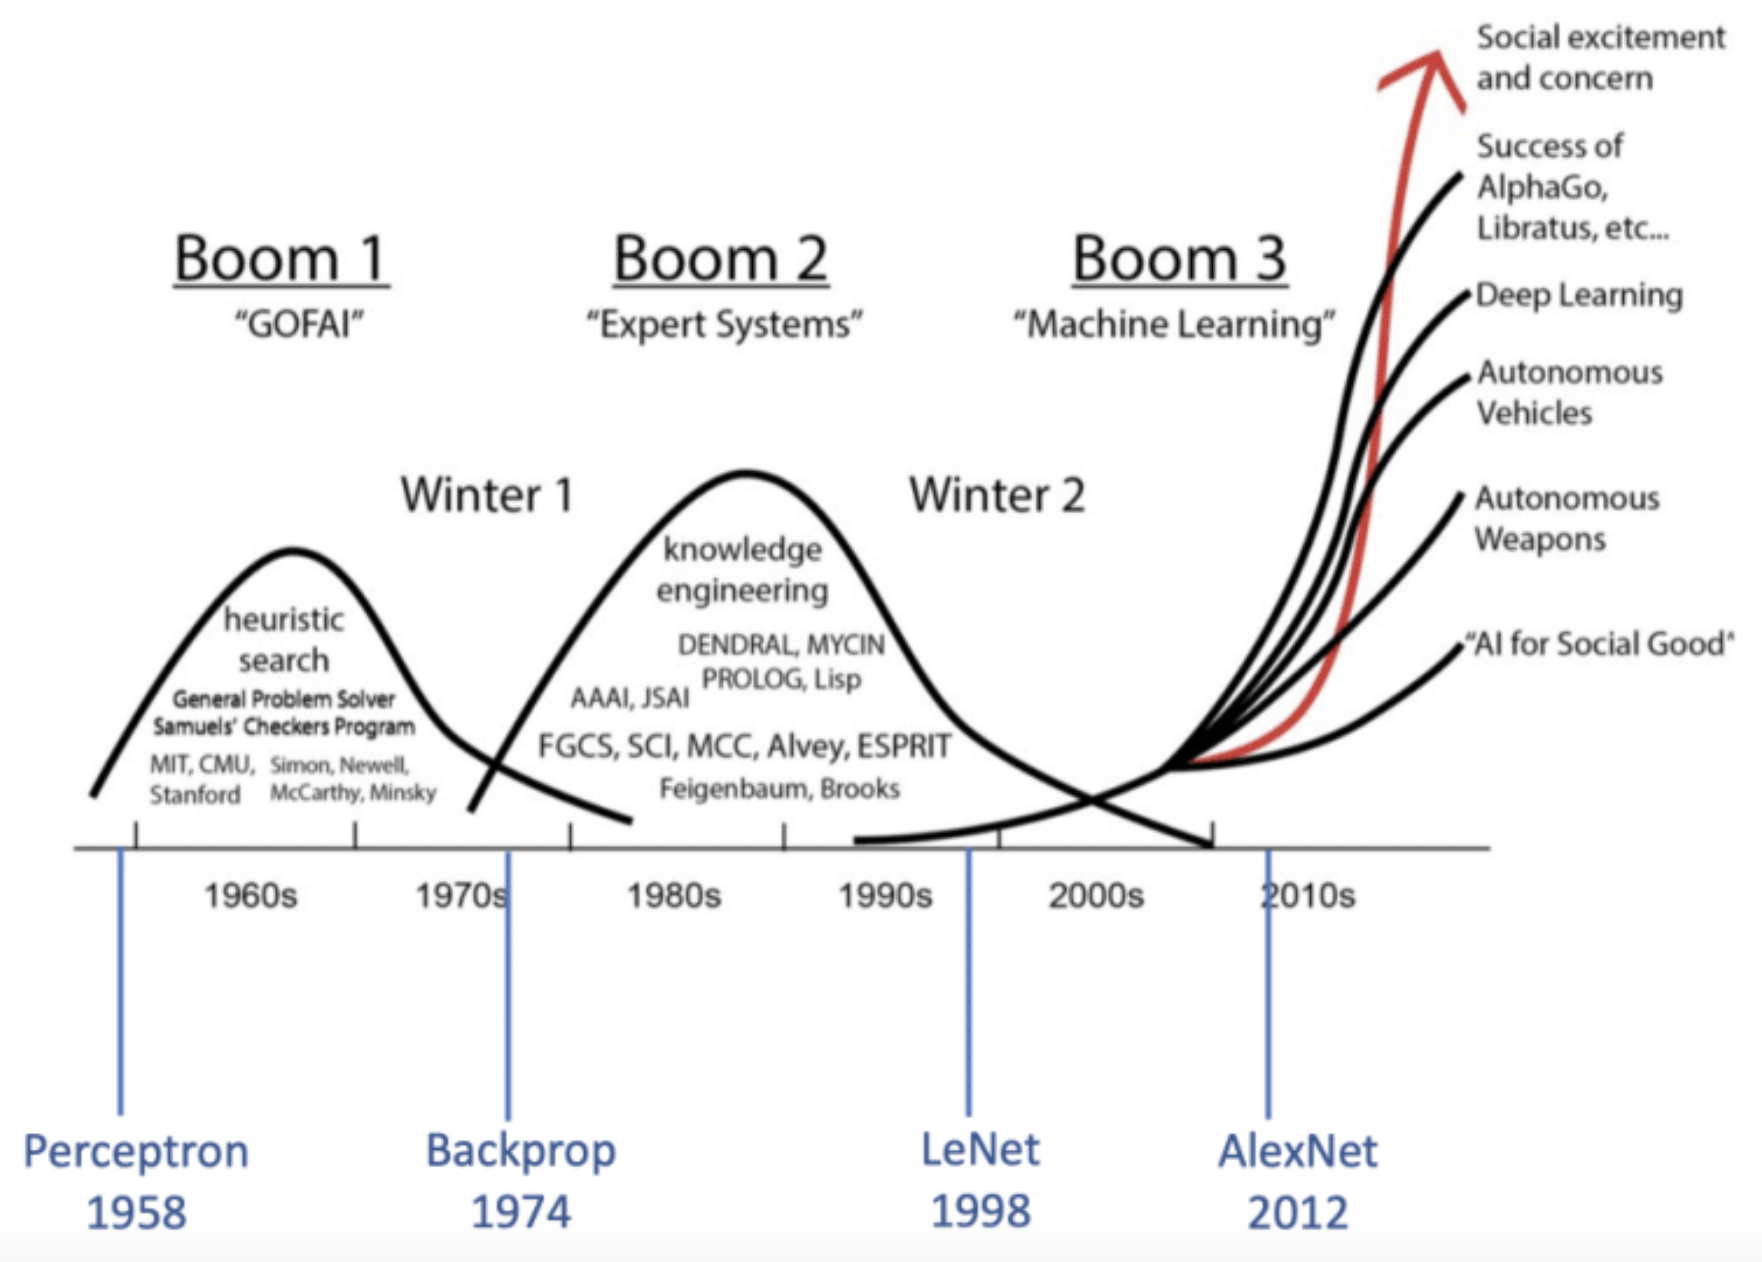

Source: https://csc413-uoft.github.io/2021/assets/slides/lec04.pdf

![neuralnets](https://cdn-images-1.medium.com/max/2000/1*cuTSPlTq0a_327iTPJyD-Q.png)

# Why should we care about convolutional neural networks (CNNs)?

![image.png](https://github.com/phelber/EuroSAT/raw/master/eurosat_overview_small.jpg?raw=true)

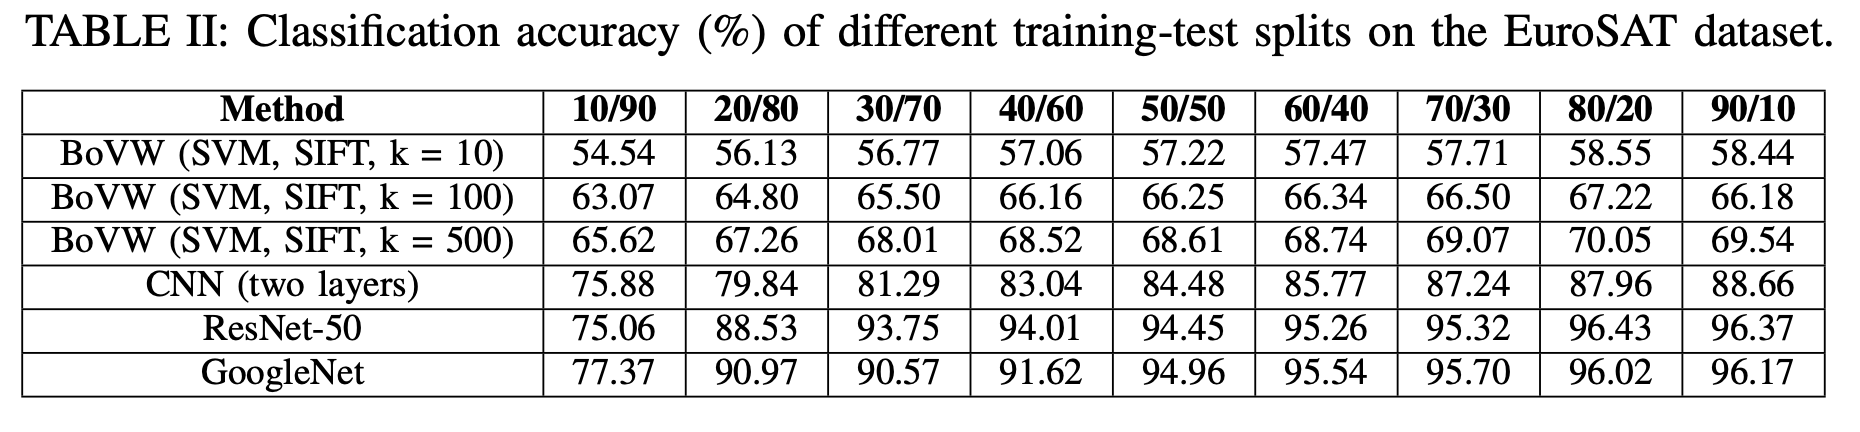

# Convolutional Neural Networks

![image.png](https://www.nvidia.com/content/dam/en-zz/Solutions/glossary/data-science/neural-networks/neural-networks-pic2.png)

### Before we get into CNNs, let's start by understanding feed forward neural networks and more specifically Multilayer Perceptrons (MLPs)

# As an aside... Whenever I read "Perceptron" it reminds of terminator

![image.png](http://allhdwallpapers.com/wp-content/uploads/2015/04/the-terminator-6.jpg)

but it has nothing to do with it. Or does it?


# Multilayer Perceptrons



# Let's start with a single neuron

![image.png](https://ujwlkarn.files.wordpress.com/2016/08/screen-shot-2016-08-09-at-3-42-21-am.png?w=1136&h=606)

* The neuron is the basic unit of computation (often called a node or unit)

* It receives input (**X**) from other nodes or external source

* It computes and output (**Y**) to either another neuron or final prediction

* Each input has an associated weight (w); it is relatve to the the other inputs

* The node applies a function f to weighted sum of its inputs

Source: https://ujjwalkarn.me/2016/08/09/quick-intro-neural-networks/

# Activation function (f)

**Activation functions  introduce non-linearity into the output of a neuron. If we didn't use them, ANNs would just be linear models.** 

![image.png](https://ujwlkarn.files.wordpress.com/2016/08/screen-shot-2016-08-08-at-11-53-41-am.png?w=1493?w=1136&h=606)

**Sigmoid**: takes a real-valued input and squashes it to range between 0 and 1.

$$\sigma(x) = \frac{1}{1 + e^{−x}}$$

**tanh**: takes a real-valued input and squashes it to the range between -1 and 1.

$$\tanh(x) = 2\sigma(2x) − 1$$

**ReLU**: ReLU stands for Rectified Linear Unit. It takes a real-valued input and thresholds it at zero (replaces negative values with zero)

$$f(x) = max(0, x)$$

Source: https://ujjwalkarn.me/2016/08/09/quick-intro-neural-networks/

# Feedforward Neural Network

![image.png](https://ujwlkarn.files.wordpress.com/2016/08/screen-shot-2016-08-09-at-4-19-50-am.png?w=996&h=736)

**Input Nodes** - They provide information from the outside world; they are referred to as the “Input Layer”. No computation is performed in any of the Input nodes.

**Hidden Nodes** - They no direct connection with the outside world. They perform computations and transfer information from the input nodes to the output nodes. A collection of hidden nodes forms a “Hidden Layer”.

**Output Nodes** – They collectively referred to as the “Output Layer” and are responsible for computations and transferring information from the network to the outside world.

Source: https://ujjwalkarn.me/2016/08/09/quick-intro-neural-networks/

# Multi Layer Perceptron (MLP)

![image.png](https://ujwlkarn.files.wordpress.com/2016/08/ds.png?w=1128?w=996&h=736)

Source: https://ujjwalkarn.me/2016/08/09/quick-intro-neural-networks/

# In practical terms...

**Input layer** - User-defined feature space (e.g., Sentinel-2 bands)

**Output layer** - Layer that produces the final prediction

**Outputs** - Final prediction of the neural network. 

**Weights** - These are the model parameters. They are optimized via Backpropagation. This is done by comparing the outputs to observations and then via backpropagation, updating the weights. There can be A LOT of weights in a neural network.

Source: https://ujjwalkarn.me/2016/08/09/quick-intro-neural-networks/

# Optimizing your neural network: Incorrect output

![image.png](https://ujwlkarn.files.wordpress.com/2016/08/screen-shot-2016-08-09-at-11-52-57-pm.png?w=1128?w=996&h=736)

Source: https://ujjwalkarn.me/2016/08/09/quick-intro-neural-networks/

# Optimizing your neural network: Backward propagation and weight adjustment

![image.png](https://ujwlkarn.files.wordpress.com/2016/08/screen-shot-2016-08-09-at-11-53-06-pm.png?w=1128?w=996&h=736)

Source: https://ujjwalkarn.me/2016/08/09/quick-intro-neural-networks/

# Optimizing your neural network: Correct output

![image.png](https://ujwlkarn.files.wordpress.com/2016/08/screen-shot-2016-08-09-at-11-53-15-pm.png?w=1128?w=996&h=736)

Source: https://ujjwalkarn.me/2016/08/09/quick-intro-neural-networks/

# Visualizing a MLP (trained on MNIST Database of handwritten digits)



In [64]:
%%HTML
<iframe width="1500" height="500" src="https://www.cs.ryerson.ca/~aharley/vis/fc/" frameborder="0" allow="accelerometer;  autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

# Let's try out an MLP on the EuroSAT data from last lecture

In [9]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt
import pickle
import scipy.stats

In [10]:
db = pickle.load(open('/data/ds/images/remote_sensing/otherDatasets/sentinel_2_subset.pck','rb'))
y = db['obs']['lc_id'][:]

In [15]:
#Spatial means + variances dataset
X = []
for var in db['covariates']:
    X.append(np.mean(db['covariates'][var],axis=(1,2)))
    X.append(np.var(db['covariates'][var],axis=(1,2)))
X = np.array(X).T
print(X.shape)

(1000, 26)


In [25]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = MLPClassifier(random_state=1, hidden_layer_sizes=(200,100),max_iter=500).fit(X_train, y_train)
print('Classification accuracy:',clf.score(X_test,y_test))

Classification accuracy: 0.705


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


**Compare that to the Random Forest results from Tuesday (Accuracy = 0.815) and why would you ever use ANNs for this type of problem?**

# Enter Convolutional Neural Networks (and Deep Learning)

# The timeline of neural networks: Revisited

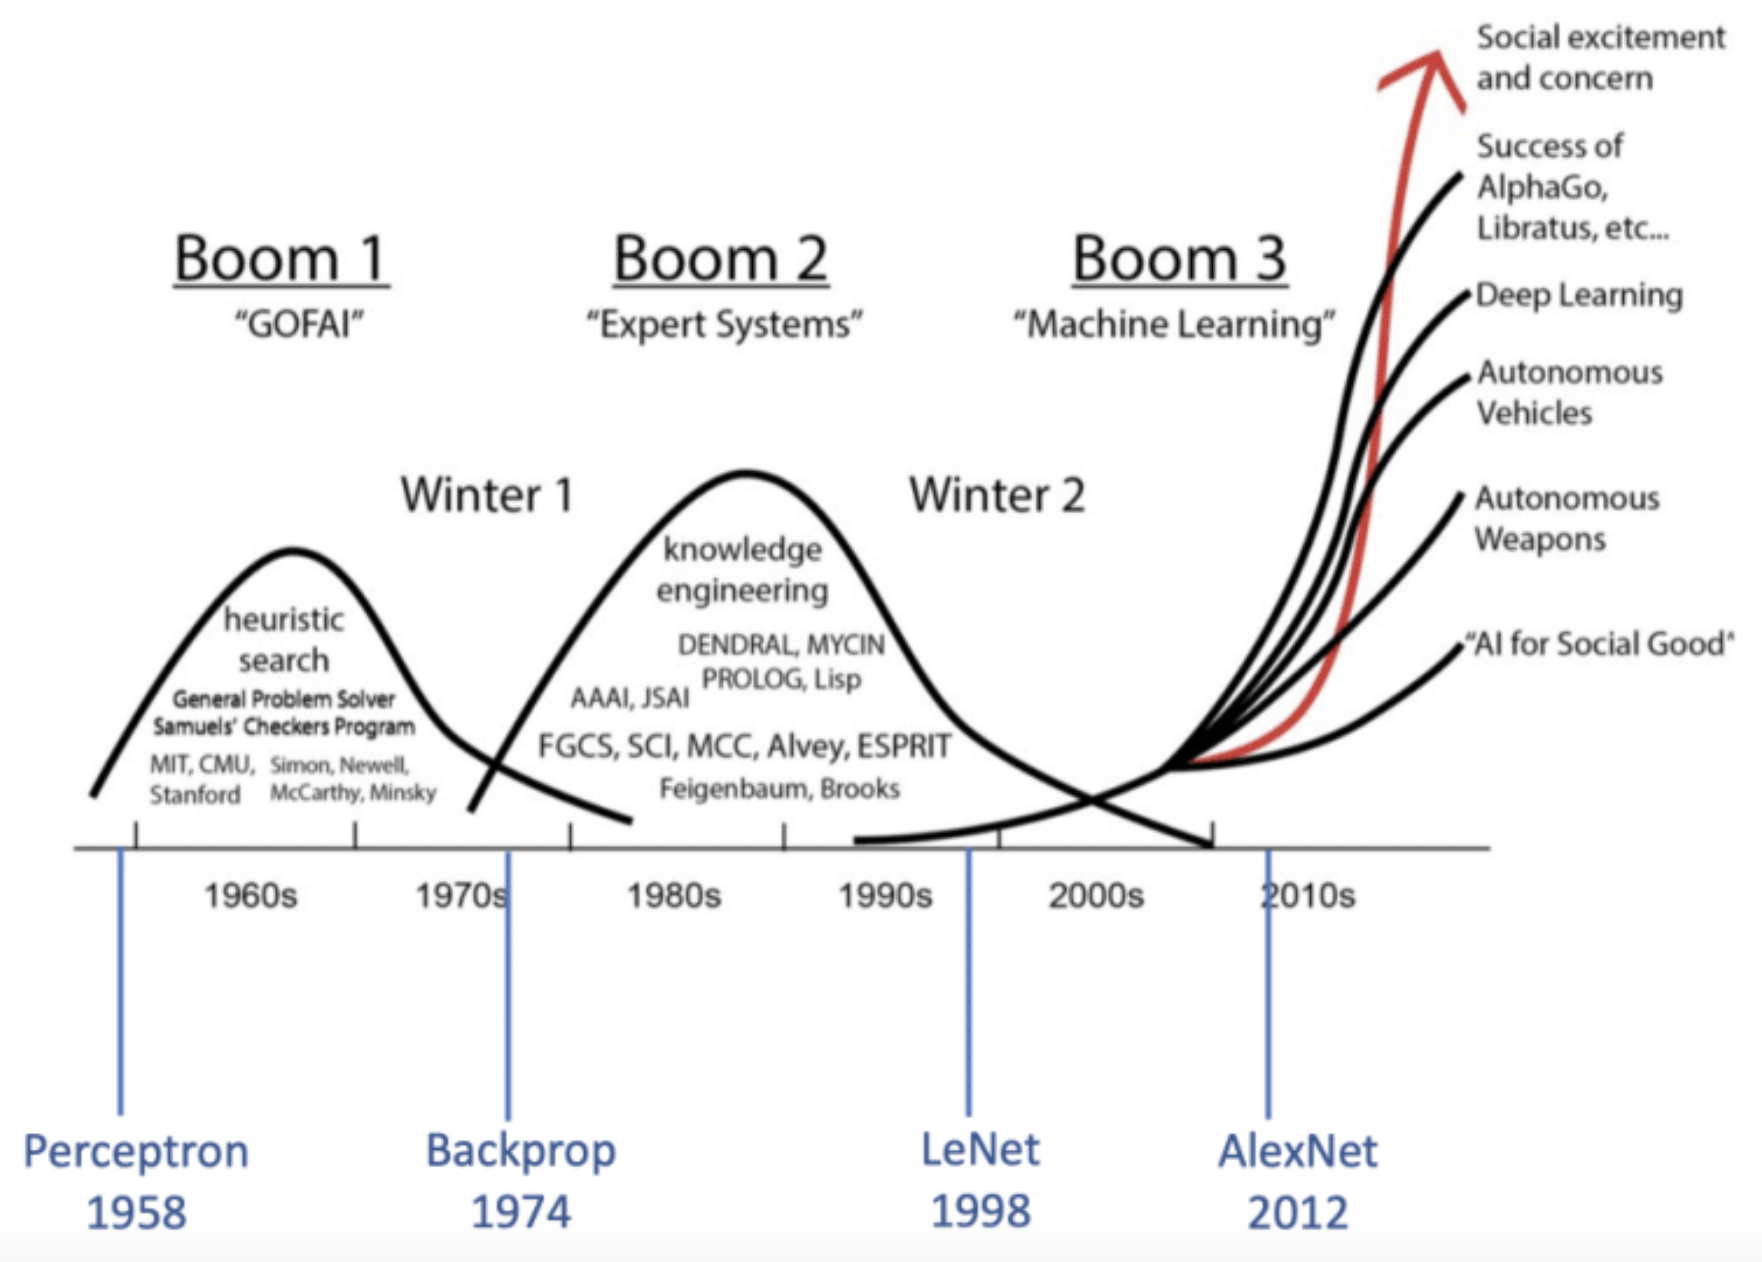

Source: https://csc413-uoft.github.io/2021/assets/slides/lec04.pdf

# Convolutional Neural Network (CNN)

![image.png](https://ujwlkarn.files.wordpress.com/2016/08/screen-shot-2016-08-07-at-4-59-29-pm.png?w=1493)

# Let's start talking about the convolution layers which are the key of CNNs

# Convolution layer

![image.png](https://ujwlkarn.files.wordpress.com/2016/07/convolution_schematic.gif)

Imagine applying this to the "Red" band array from one of the 640 m x 640 m geotiffs from EuroSAT

# Types of filters

![image.png](https://ujwlkarn.files.wordpress.com/2016/08/screen-shot-2016-08-05-at-11-03-00-pm.png)

In convolutional neural networks, the filters are learned the same way as hyperparameters through backpropagation during the training process.

# Let me reemphasize that...

**The filters in the convolution layer are learned via backpropagation in the CNN**

In other words, goodbye feature engineering!

![image.png](https://ujwlkarn.files.wordpress.com/2016/08/screen-shot-2016-08-07-at-4-59-29-pm.png?w=1493)

# Gaining intuition: Applying filters

![image.png](https://ujwlkarn.files.wordpress.com/2016/08/giphy.gif?w=480&zoom=2)


# Let's try out some of these filters for our EuroSAT data

# Edge detection

$$\begin{equation*}
\mathbf{}\left[\begin{matrix}
-1 & -1 & -1\\ -1 & 8 & -1\\ -1 & -1 & -1
\end{matrix}\right] 
\end{equation*}
$$

(-0.5, 63.5, 63.5, -0.5)

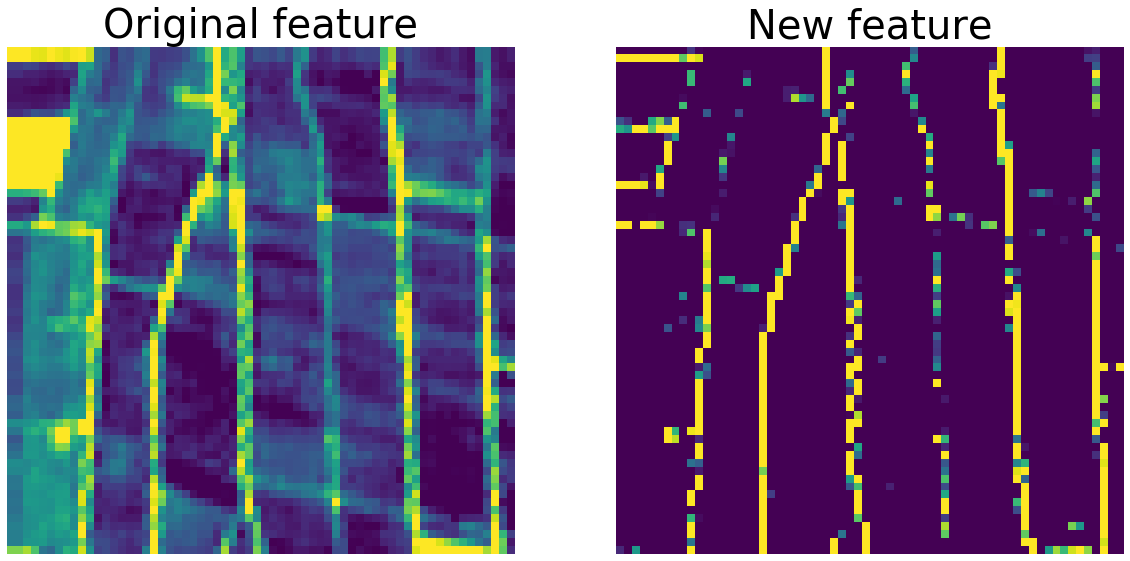

In [52]:
import scipy
filter = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
#Apply to the red band in Sentinel-2 for site 150
vmin = np.percentile(db['covariates']['b4'][150,:,:],5)
vmax = np.percentile(db['covariates']['b4'][150,:,:],95)
tmp = scipy.ndimage.convolve(db['covariates']['b4'][150,:,:],filter)
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.title('Original feature',fontsize=40)
plt.imshow(db['covariates']['b4'][150,:,:],vmin=vmin,vmax=vmax)
plt.axis('off')
plt.subplot(122)
plt.title('New feature',fontsize=40)
plt.imshow(tmp,vmin=vmin,vmax=vmax)
plt.axis('off')

# Sharpen

$$\begin{equation*}
\mathbf{}\left[\begin{matrix}
0 & -1 & 0\\ -1 & 5 & -1\\ 0 & -1 & 0
\end{matrix}\right] 
\end{equation*}
$$

(-0.5, 63.5, 63.5, -0.5)

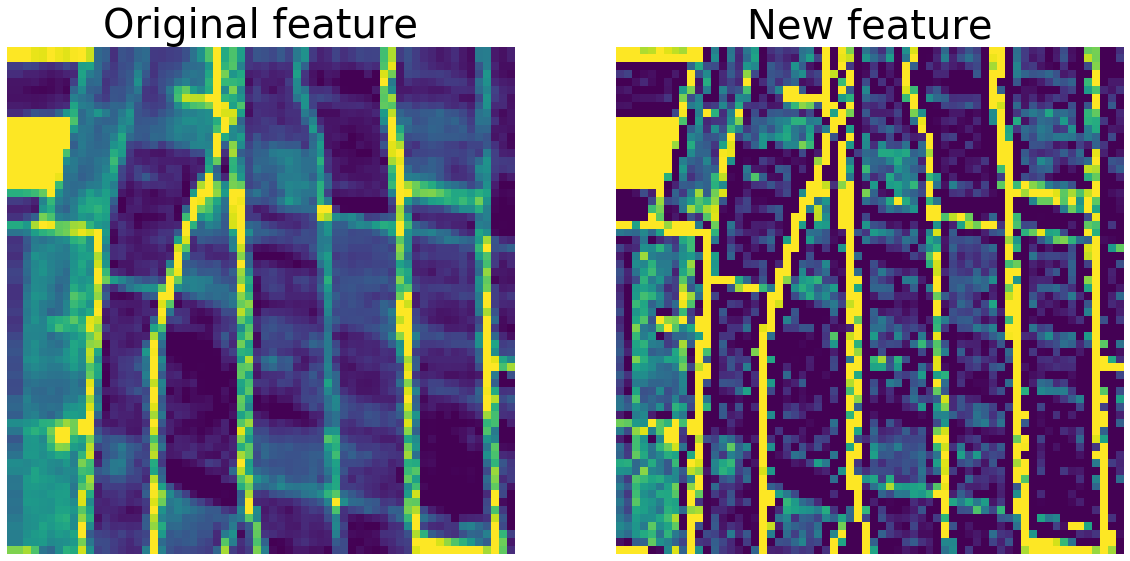

In [53]:
import scipy
filter = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
#Apply to the red band in Sentinel-2 for site 150
tmp = scipy.ndimage.convolve(db['covariates']['b4'][150,:,:],filter)
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.title('Original feature',fontsize=40)
plt.imshow(db['covariates']['b4'][150,:,:],vmin=vmin,vmax=vmax)
plt.axis('off')
plt.subplot(122)
plt.title('New feature',fontsize=40)
plt.imshow(tmp,vmin=vmin,vmax=vmax)
plt.axis('off')

# Gaussian blur

$$\begin{equation*}
\frac{1}{16}\mathbf{}\left[\begin{matrix}
1 & 2 & 1\\ 2 & 4 & 2\\ 1 & 2 & 1
\end{matrix}\right] 
\end{equation*}
$$

(-0.5, 63.5, 63.5, -0.5)

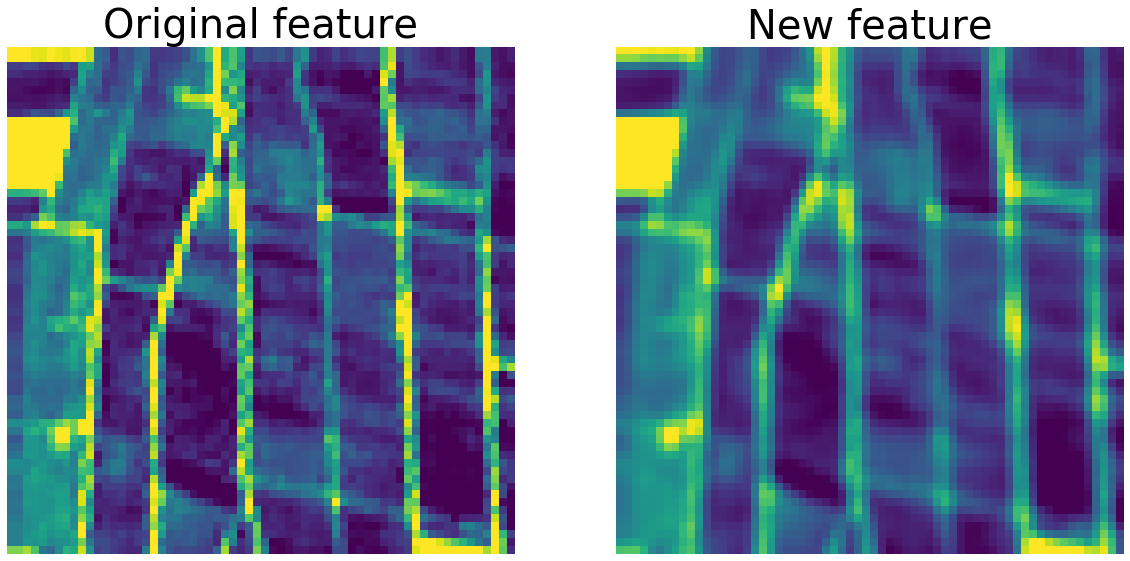

In [55]:
import scipy
filter = np.array([[1,2,1],[2,4,2],[1,2,1]])
#Apply to the red band in Sentinel-2 for site 150
tmp = (1/16)*scipy.ndimage.convolve(db['covariates']['b4'][150,:,:],filter)
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.title('Original feature',fontsize=40)
plt.imshow(db['covariates']['b4'][150,:,:],vmin=vmin,vmax=vmax)
plt.axis('off')
plt.subplot(122)
plt.title('New feature',fontsize=40)
plt.imshow(tmp,vmin=vmin,vmax=vmax)
plt.axis('off')

# Dimensions of the emergent feature (convolution layer) 

![image.png](https://ujwlkarn.files.wordpress.com/2016/08/screen-shot-2016-08-07-at-4-59-29-pm.png?w=1493)

* **Depth** - Number of filters used in the convolution operation
* **Stride** - Number of pixels by which we slide our filter matrix over the input matrix.
* **Zero-Padding** - It can be convenient to pad the input matrix with zeros around the border; this allows the convolved feature to have the same dimensions as the input feature. 

Source: https://ujjwalkarn.me/2016/08/11/intuitive-explanation-convnets/

# Apply activation function (normally ReLU) after convoution

![image.png](https://ujwlkarn.files.wordpress.com/2016/08/screen-shot-2016-08-10-at-2-23-48-am.png?w=1071&h=336)

ReLU is an element wise operation (applied per pixel) and replaces all negative pixel values in the convolved feature by zero. The purpose of ReLU is to introduce non-linearity in our ConvNet.

Source: https://ujjwalkarn.me/2016/08/11/intuitive-explanation-convnets/

# ReLU example

![image.png](https://ujwlkarn.files.wordpress.com/2016/08/screen-shot-2016-08-07-at-6-18-19-pm.png?w=1496)

Source: http://mlss.tuebingen.mpg.de/2015/slides/fergus/Fergus_1.pdf

# Pooling 

Spatial Pooling (also called subsampling or downsampling) reduces the dimensionality of each feature map but retains the most important information. Spatial Pooling can be of different types: Max, Average, Sum etc.

![image.png](https://ujwlkarn.files.wordpress.com/2016/08/screen-shot-2016-08-10-at-3-38-39-am.png?w=988)

Source: https://ujjwalkarn.me/2016/08/11/intuitive-explanation-convnets/

# Pooling example

![image.png](https://ujwlkarn.files.wordpress.com/2016/08/screen-shot-2016-08-07-at-6-11-53-pm.png)

Think of pooling as the examples when we compute the spatial mean of our feature.

Source: http://mlss.tuebingen.mpg.de/2015/slides/fergus/Fergus_1.pdf

# And the rest is just a Multi Layer Perceptron (MLP)!

![image.png](https://ujwlkarn.files.wordpress.com/2016/08/screen-shot-2016-08-07-at-9-15-21-pm.png?w=1496)

The convolution/pooling layers are meant to assemble the feature space that we then use in the MLP for the classification and regression stage. 

# Visualizing a CNN (trained on MNIST Database of handwritten digits)

In [65]:
%%HTML
<iframe width="1500" height="500" src="https://www.cs.ryerson.ca/~aharley/vis/conv/" frameborder="0" allow="accelerometer;  autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

# CNNs get messy...

# Googlenet

![image.png](https://cdn-images-1.medium.com/max/2600/1*ZFPOSAted10TPd3hBQU8iQ.png)


# Training CNNs gets very computationally expense... hence GPUs

![image.png](http://cdn.wccftech.com/wp-content/uploads/2013/01/GeForce-Titan-GPU.jpg)

# Transfer learning

![image.png](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Flearnopencv.com%2Fwp-content%2Fuploads%2F2019%2F05%2Ftransfer-learning-1024x574.jpg&f=1&nofb=1)

But why? Some of these CNNs take a LONG time to train. This allows us to leverage a CNNs feature extraction capabilities and then train the final layers for our own given specific case. 

Source: https://learnopencv.com/image-classification-using-transfer-learning-in-pytorch/


# Bringing it home...

![image.png](https://github.com/phelber/EuroSAT/raw/master/eurosat_overview_small.jpg?raw=true)

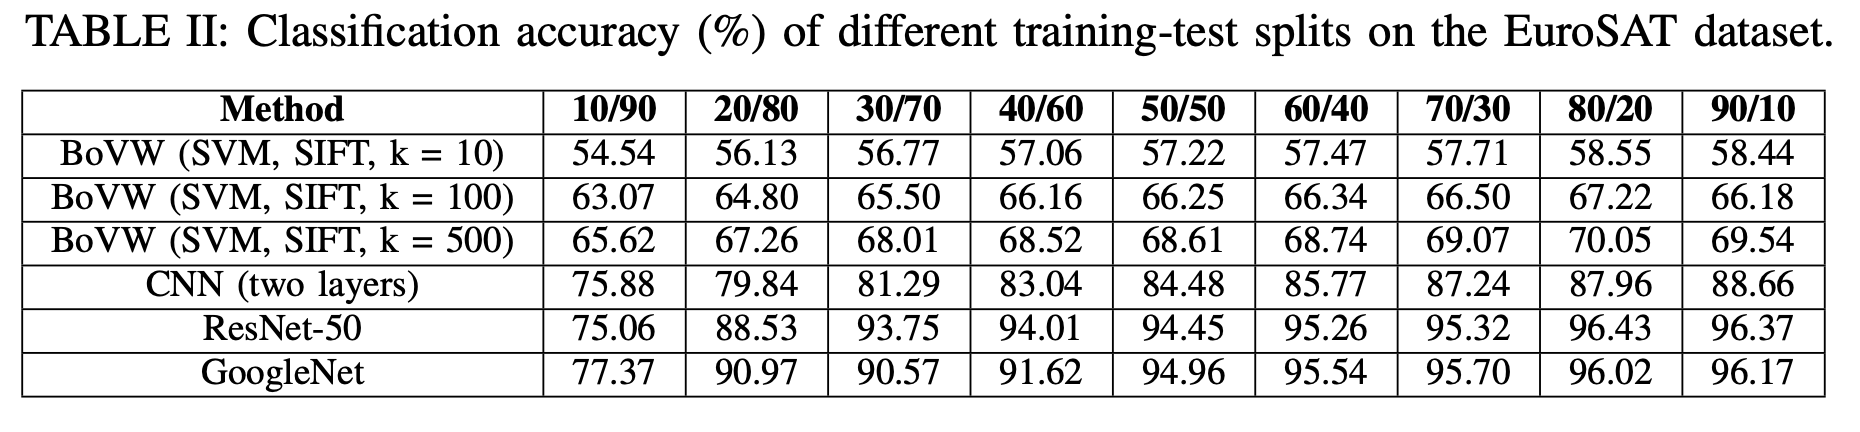

# CNN in Python?

![image.png](https://specials-images.forbesimg.com/imageserve/5fc09cf1950179a3f5f74874/960x0.jpg?fit=scale)


![image.png](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse3.mm.bing.net%2Fth%3Fid%3DOIP.O1qZr9uWL9HE8ut78-y5AgHaDt%26pid%3DApi&f=1)

![image.png](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fnjtrainingacademy.com%2Fwp-content%2Fuploads%2F2019%2F02%2Fkeras-1.png&f=1&nofb=1)

None of these packages are installed on the docker containers this year. However, if you want to use them for your projects, come talk to me.

**We only scratched the surface on CNNs. There is a LOT more. Hopefully this gave you some intuition into how to use them.**